In [20]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [3]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['cnc', 'Virginia', '.DS_Store', 'San_Franciso', 'France', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'census_ethnicities', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'Sri_Lanka', 'Los_Angeles_2017.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'Bolivia', 'San_Francisco_Bay_2016.csv', 'northcarolina', 'UK', 'San_Francisco_Bay_2017.csv', 'Los_Angeles', 'India', 'Texas', 'old data']


In [4]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,20069,1:15 pm.,2016-07-14,2016-07-14 20:15:00+00:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis...",3.0,Weekday
1,20070,1:00 pm.,2016-03-25,2016-03-25 20:00:00+00:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa...",4.0,Weekday
2,68373,6:30,2016-02-12,2016-02-12 14:30:00+00:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis...",4.0,Weekday
3,158736,2:19,2016-10-14,2016-10-14 21:19:00+00:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di...",4.0,Weekday
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10 21:20:00+00:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '...",6.0,Weekend


In [5]:
sf_2016 = dfs['Francisco_Bay'][2016]
sf_2017 = dfs['Francisco_Bay'][2017]
sf_2018 = dfs['Francisco_Bay'][2018]
sf_2019 = dfs['Francisco_Bay'][2019]
sf_2020 = dfs['Francisco_Bay'][2020]
sf_2021 = dfs['Francisco_Bay'][2021]
sf_2022 = dfs['Francisco_Bay'][2022]
sf_2023 = dfs['Francisco_Bay'][2023]

In [6]:
sf_2016

,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,20069,1:15 pm.,2016-07-14,2016-07-14 20:15:00+00:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis...",3.0,Weekday
1,20070,1:00 pm.,2016-03-25,2016-03-25 20:00:00+00:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa...",4.0,Weekday
2,68373,6:30,2016-02-12,2016-02-12 14:30:00+00:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis...",4.0,Weekday
3,158736,2:19,2016-10-14,2016-10-14 21:19:00+00:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di...",4.0,Weekday
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10 21:20:00+00:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '...",6.0,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140615,191063817,2016/12/17 10:34 AM,2016-12-17,2016-12-17 18:34:00+00:00,America/Los_Angeles,2023-11-14T21:05:47-08:00,2023-11-16T13:53:32-08:00,NaN,781032,research,...,species,37763.0,True,False,False,6656.0,6656.0,"[{'user_id': 781032, 'category': 'improving', ...",5.0,Weekend
140616,191063820,2016/12/17 7:57 AM,2016-12-17,2016-12-17 15:57:00+00:00,America/Los_Angeles,2023-11-14T21:05:48-08:00,2023-11-14T21:06:31-08:00,NaN,781032,research,...,species,416305.0,False,False,False,1901.0,1901.0,"[{'user_id': 781032, 'category': 'improving', ...",5.0,Weekend
140617,191582930,2016/07/05 3:26 AM,2016-07-05,2016-07-05 10:26:00+00:00,America/Los_Angeles,2023-11-20T06:58:31-08:00,2023-11-20T08:23:04-08:00,NaN,6083433,needs_id,...,genus,9079.0,False,False,False,214341.0,214341.0,"[{'user_id': 6083433, 'category': 'improving',...",1.0,Weekday
140618,191851164,2016/01/12 10:30 AM,2016-01-12,2016-01-12 18:30:00+00:00,America/Los_Angeles,2023-11-23T07:45:15-08:00,2023-11-23T08:01:47-08:00,NaN,40959,research,...,species,4933.0,True,False,False,97492.0,97492.0,"[{'user_id': 40959, 'category': 'improving', '...",1.0,Weekday


# Calculate participation

## Get number of observations and identifications

In [7]:
def get_obs_ident_per_users(dfcity,year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year,
            'time_observed_at': row['time_observed_at']
            
            
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident

In [8]:
# Initialize empty dictionary to store results for each year
sf_dataframes = {}

# Iterate over the years
for year in range(2016, 2024):
    # Extract DataFrame for the current year and city 'SF'
    dfcity = dfs['Francisco_Bay'][year]
    # Process data for the current year
    sf_dataframes[year] = get_obs_ident_per_users(dfcity, year)

#access dataframe for each year

In [9]:
sf_2016 = sf_dataframes[2016]
sf_2017 = sf_dataframes[2017]
sf_2018 = sf_dataframes[2018]
sf_2019 = sf_dataframes[2019]
sf_2020 = sf_dataframes[2020]
sf_2021 = sf_dataframes[2021]
sf_2022 = sf_dataframes[2022]
sf_2023 = sf_dataframes[2023]

In [10]:
df= [sf_2016,sf_2017,sf_2018,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]

# TEST

### Function to do log trasnformation before clustering


In [164]:
#Function to do log trasnformation before clustering
def transform_data(df):
    # Step before log transformation to avoid the zeros
    df['obs_count_1'] = df['n_obs'] + 1
    df['ident_count_1'] = df['n_idents'] + 1

    # Log transform
    df['obs_count_log'] = np.log(df['obs_count_1'])
    df['ident_count_log'] = np.log(df['ident_count_1'])

    # Select variables for plotting
    df_select = df[['user_id', 'obs_count_log', 'ident_count_log']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['obs_count_log', 'ident_count_log']
    features = df_std[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.rename(columns={'obs_count_log': 'obs_count_scaled', 'ident_count_log': 'ident_count_scaled'}, inplace=True)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std

# Test dataframe
#transformed_data = transform_data(sf_2016)
#print(transformed_data)


#k-means function without inertia
def perform_kmeans_clustering(df):
    label_dict = {0: 'high activity', 1: 'identifiers', 2: 'observers', 3: 'low activity'}

    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count_scaled', 'ident_count_scaled']])
    df['cluster'] = kmeans.labels_
    df['user_type'] = df['cluster'].map(label_dict)
    df = df.sort_values('user_id')  
    
    return df


In [184]:
#k-means function with inertia
def perform_kmeans_clustering(df):
    
 # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count_scaled', 'ident_count_scaled']])
    df['cluster'] = kmeans.labels_

    # Get the # Centroid values
    centroids = kmeans.cluster_centers_

    # Compute sum of the squared error (SSE) after the centroids converge,
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['obs_count_scaled', 'ident_count_scaled'])

    # print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")

    # label each cluster based on the centroids
    cluster_labels = {}
    for i, centroid in enumerate(centroids):
        obs_value = centroid[0]
        ident_value = centroid[1]
        if obs_value > 2 and ident_value > 2:  # High activity
            cluster_labels[i] = 'high activity'
        elif obs_value > 1 and ident_value > 1:  # Identifiers
            cluster_labels[i] = 'identifiers'
        elif obs_value > 0.5:  # Observers
            cluster_labels[i] = 'observers'
        else:  # Low activity
            cluster_labels[i] = 'low activity'

    # Map the cluster labels to the dataframe
    df['user_type'] = df['cluster'].map(lambda x: cluster_labels[x])
    df = df.sort_values('user_id')
    
    return df, sse, centroids_df


In [185]:
# Define color palette
# Define color palette
palette = {
    'low activity': 'yellow',
    'high activity': 'red',
    'observers': 'green',
    'identifiers': 'blue'
}

# Plot the clusters
def visualize_clusters(df, centroids_df, year):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='obs_count_scaled', y='ident_count_scaled', hue='user_type', palette=palette, s=10, alpha=0.6, edgecolor='w')

    # Plot the centroids
    plt.scatter(centroids_df['obs_count_scaled'], centroids_df['ident_count_scaled'], c='black', s=50, alpha=0.5, marker='*')
    
    # Set legend order and title
    handles, labels = plt.gca().get_legend_handles_labels()
    order = ['high activity', 'observers', 'identifiers', 'low activity']
    ordered_handles = [handles[labels.index(label)] for label in order if label in labels]
    ordered_labels = [label for label in order if label in labels]
    plt.legend(ordered_handles, ordered_labels, title='User Type')

    plt.title(f'User Clusters - {year}', fontsize=16)
    plt.xlabel('Scaled Observation')
    plt.ylabel('Scaled Identification')
    plt.legend(title='User Type', loc='upper right')
    plt.show()



In [186]:
def process_dataframe(df, year):
    # Log transformation
    df_log = transform_data(df)
    
    # K-Means Clustering on log transformed data
    df_clustered, sse, centroids_df = perform_kmeans_clustering(df_log)
    
    # Visualize clusters
    visualize_clusters(df_clustered, centroids_df, year)
    
    return df_clustered, sse

In [187]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.744251           -0.259303
1          1.829833            3.392336
2          1.507666           -0.048306
3          0.157477           -0.233562
Sum of Squared Error (SSE): 2735.211055931744


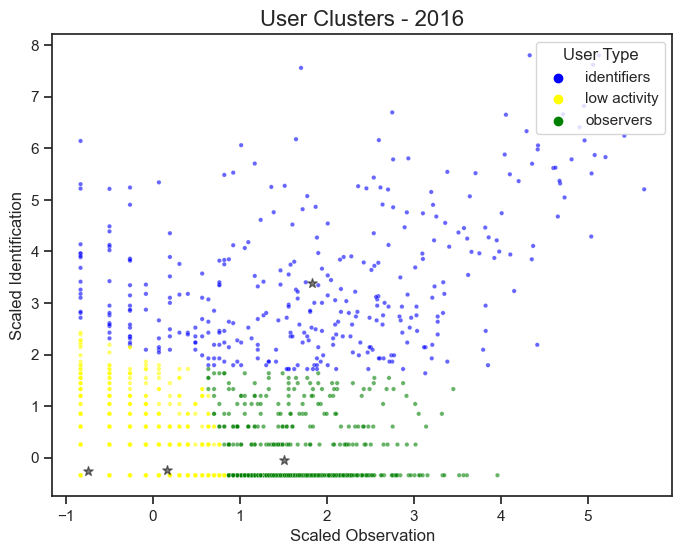

Centroids:
    obs_count_scaled  ident_count_scaled
0          0.927668           -0.211643
1         -0.589221           -0.269012
2          2.992492            4.754658
3          0.841386            2.232663
Sum of Squared Error (SSE): 3851.538398888232


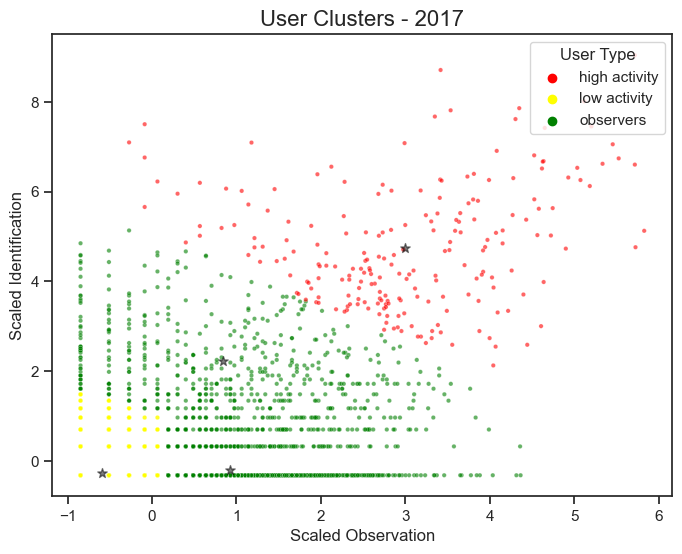

Centroids:
    obs_count_scaled  ident_count_scaled
0          0.912085           -0.212286
1         -0.617971           -0.242390
2          2.780381            5.426061
3          1.123126            2.304517
Sum of Squared Error (SSE): 6562.381083517661


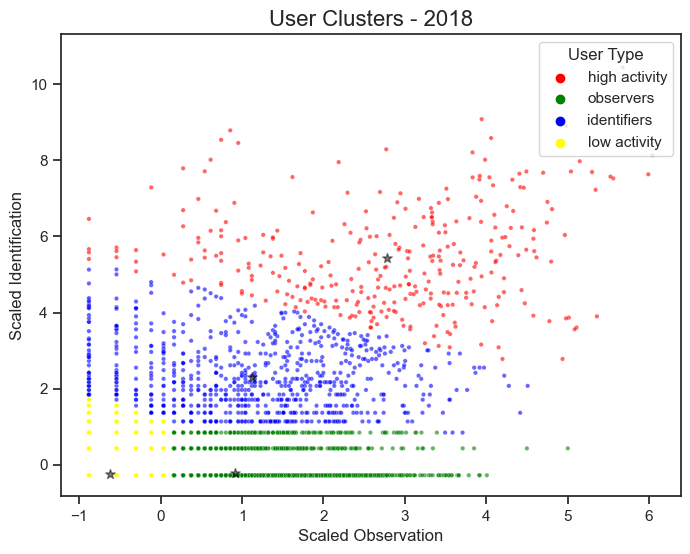

Centroids:
    obs_count_scaled  ident_count_scaled
0          1.323467            2.528787
1          2.814547            5.991354
2          1.042158           -0.186995
3         -0.566845           -0.224073
Sum of Squared Error (SSE): 9631.191965221235


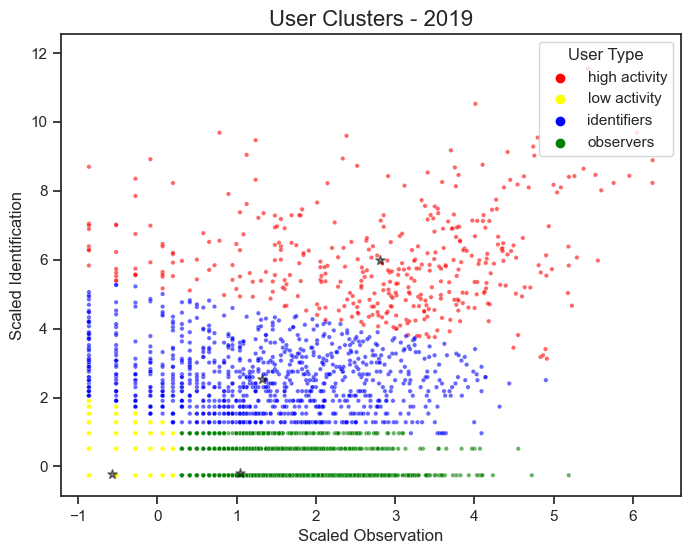

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.553896           -0.214655
1          1.048465           -0.174484
2          2.884487            6.242977
3          1.419310            2.514239
Sum of Squared Error (SSE): 12035.671916827165


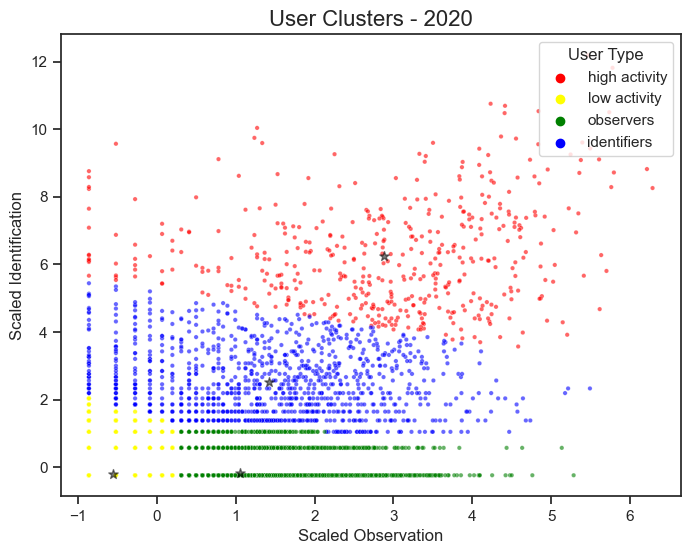

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.746367           -0.197991
1          1.688902            0.064111
2          2.343604            5.044205
3          0.187552           -0.174006
Sum of Squared Error (SSE): 13538.790597137888


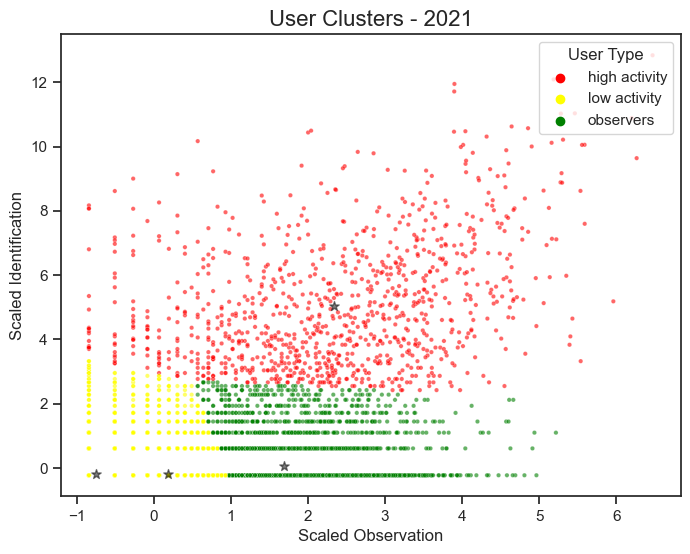

Centroids:
    obs_count_scaled  ident_count_scaled
0          1.952708            0.155215
1         -0.623555           -0.202979
2          2.253130            4.938906
3          0.532885           -0.160948
Sum of Squared Error (SSE): 13402.199780459372


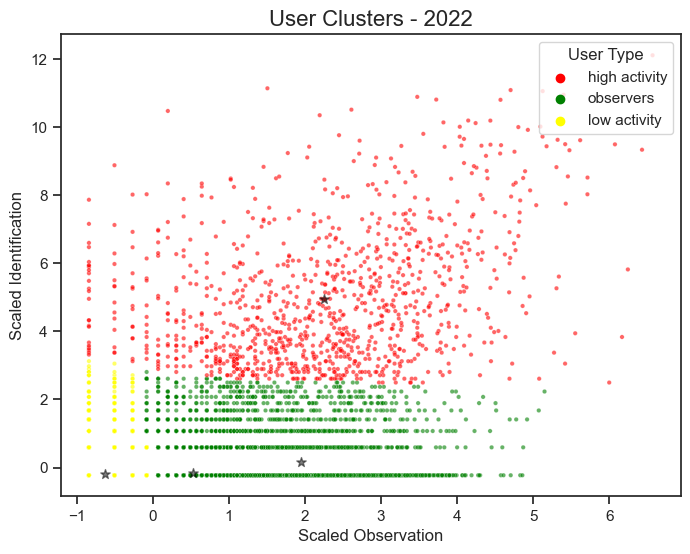

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.554869           -0.211214
1          1.552170            2.564327
2          1.086006           -0.172314
3          2.630380            6.284568
Sum of Squared Error (SSE): 12703.980881961792


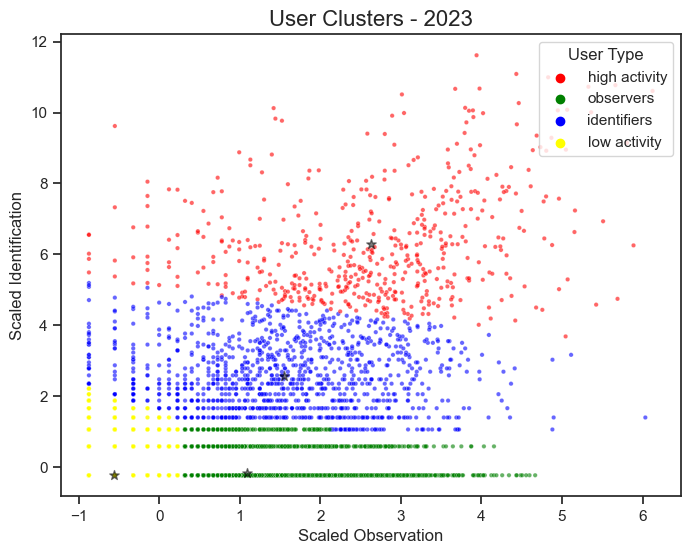

In [188]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame
for df, year in zip(df_list, years):
    df_clustered, sse = process_dataframe(df, year)
    #print(f"Processed year: {year}, SSE: {sse}")

#visualise

# Define color palette
color_dict = {
    'high activity': 'red',
    'identifiers': 'blue',
    'observers': 'green',
    'low activity': 'orange'
}

def visualize_clusters(df,year):
    sns.set(rc={'axes.facecolor': 'EFEFEF'})
    plt.figure(figsize=(6, 6))
    ax = plt.axes()
    sns.set(style="ticks")
    sns.scatterplot(data=df, x='obs_count_scaled', y='ident_count_scaled',
                    hue='user_type',
                    palette=color_dict,
                    s=30, linewidth=0, alpha=0.5)
    sns.set_style("ticks")
    plt.legend(loc='upper left')
    plt.title(f'K-Means Clustering - {year}', fontsize=16)
    #plt.title('K-means clustering', fontsize=16)
    plt.xlabel('Observation', fontsize=16)
    plt.ylabel('Identification', fontsize=16)
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,5)
    ax.set_facecolor("white")
    #plt.savefig(filename)
    plt.show()


def process_dataframe(df):
    # Log transformation
    df_log = transform_data(df)
    
    # K-Means Clustering on log transfored data
    df_clustered = perform_kmeans_clustering(df_log)
    
    #visualise
    visualize_clusters(df_clustered,year)
    
    return df


In [152]:
iden = c.loc[c['user_type']=='identifiers']
iden.head().sort_values('user_id')

NameError: name 'c' is not defined

In [105]:
#test 
higha = c.loc[c['user_type']=='high activity']
higha.head().sort_values('user_id')

NameError: name 'c' is not defined

In [52]:
def cluster_and_visualize(df, city, year):
    color_dict = {'high activity':'red',
                  'identifiers':'blue',
                  'observers':'green',
                  'low activity':'orange'}
    label_dict = {0:'high activity', 1:'identifiers', 2:'observers', 3:'low activity'}
    
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count', 'ident_count']])
    df[f'cluster_{year}'] = kmeans.labels_
    df[f'user_type{year}'] = [label_dict.get(i) for i in df[f'cluster_{year}']]
    
    sns.set(rc={'axes.facecolor':'EFEFEF'})
    ax = plt.figure(figsize=(10,8))
    ax = plt.axes()
    sns.set(style="ticks")
    ax = sns.scatterplot(data=df, x=f'obs_count_{year}', y=f'ident_count_{year}',
                         hue=f'user_type{year}',
                         palette=color_dict,
                         s=80, linewidth=0, alpha=0.5)
    sns.set_style("ticks")
    plt.legend(loc='upper left')
    plt.title(f'{city} {year}', fontsize=16)
    plt.xlabel('observation', fontsize=16)
    plt.ylabel('Identification', fontsize=16)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_facecolor("white")
    plt.savefig(f'{city}_{year}_scatter.png')
    plt.show()
    return df


## All function in one

In [153]:

def perform_kmeans_clustering(df):
    
 # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count_scaled', 'ident_count_scaled']])
    df['cluster'] = kmeans.labels_

    # Get the # Centroid values
    """
     average positions of all the data points within each cluster.
    """
    centroids = kmeans.cluster_centers_

    # Compute sum of the squared error (SSE) after the centroids converge,
    """
    measures the total squared distance between data points and their cluster centroids 
    with the aim of minimizing the value
    """
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['obs_count_scaled', 'ident_count_scaled'])

    # print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")

    # choose the label for each cluster based on the centroids
    cluster_labels = {}
    for i, centroid in enumerate(centroids):
        obs_value = centroid[0]
        ident_value = centroid[1]
        if obs_value > 2 and ident_value > 2:  # High activity
            cluster_labels[i] = 'high activity'
        elif obs_value > 1 and ident_value > 1:  # Identifiers
            cluster_labels[i] = 'identifiers'
        elif obs_value > 0.5:  # Observers
            cluster_labels[i] = 'observers'
        else:  # Low activity
            cluster_labels[i] = 'low activity'

    # Map the cluster labels to the dataframe
    df['user_type'] = df['cluster'].map(lambda x: cluster_labels[x])
    df = df.sort_values('user_id')

    # Define color palette
    palette = {
        'low activity': 'yellow',
        'high activity': 'red',
        'observers': 'green',
        'identifiers': 'blue'
    }

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='obs_count_scaled', y='ident_count_scaled', hue='user_type', palette=palette, s=10, alpha=0.6, edgecolor='w')

    # Plot the centroids
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=20, alpha=0.5, marker='*')
    
    # Set legend order and title
    handles, labels = plt.gca().get_legend_handles_labels()
    order = ['high activity', 'observers', 'identifiers', 'low activity']
    ordered_handles = [handles[labels.index(label)] for label in order if label in labels]
    ordered_labels = [label for label in order if label in labels]
    plt.legend(ordered_handles, ordered_labels, title='User Type')

    plt.title(f'User Clusters - {year}', fontsize=16)
    plt.xlabel('Scaled Observation Count')
    plt.ylabel('Scaled Identification Count')
    plt.legend(title='User Type',loc='upper right')
    plt.show()

    return df, sse


# df = pd.read_csv('your_data.csv')
# df = perform_kmeans_clustering(df)
# print(df.head())


Centroids:
    obs_count_scaled  ident_count_scaled
0          1.866887            3.559429
1         -0.622715           -0.246064
2          1.808385            0.196814
3          0.501036           -0.251039
Sum of Squared Error (SSE): 2736.778118219865


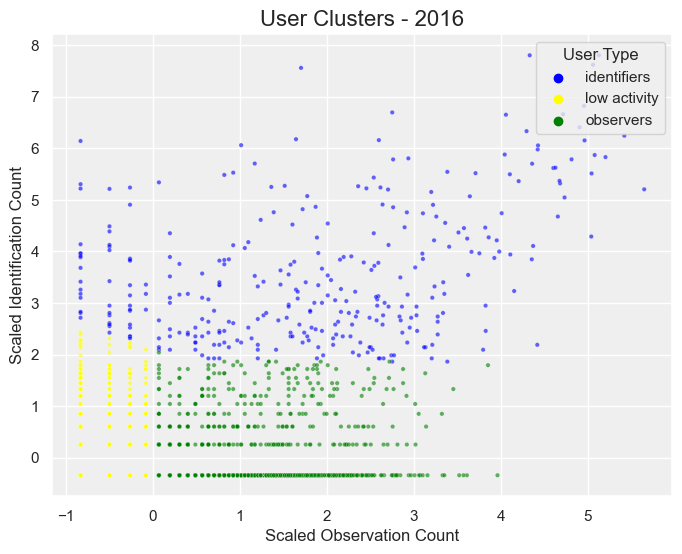

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.589789           -0.272077
1          0.849974            2.025959
2          2.871526            4.671540
3          0.917112           -0.237581
Sum of Squared Error (SSE): 3849.654117085442


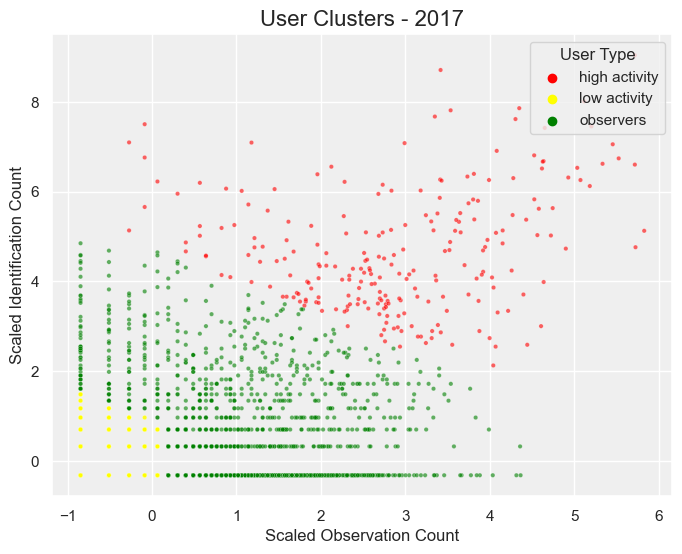

Centroids:
    obs_count_scaled  ident_count_scaled
0          0.910200           -0.213148
1         -0.617971           -0.242390
2          2.748748            5.411322
3          1.136509            2.282576
Sum of Squared Error (SSE): 6562.394873797037


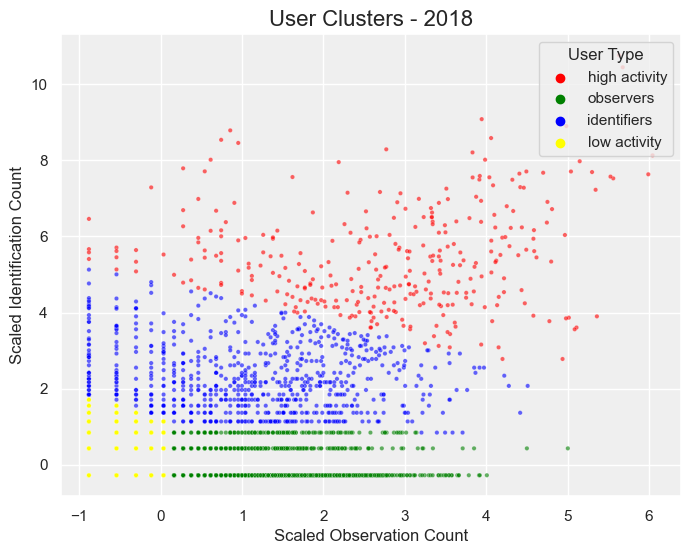

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.601996           -0.224415
1          0.953477           -0.193571
2          2.795934            5.958564
3          1.350207            2.478748
Sum of Squared Error (SSE): 9650.181404673429


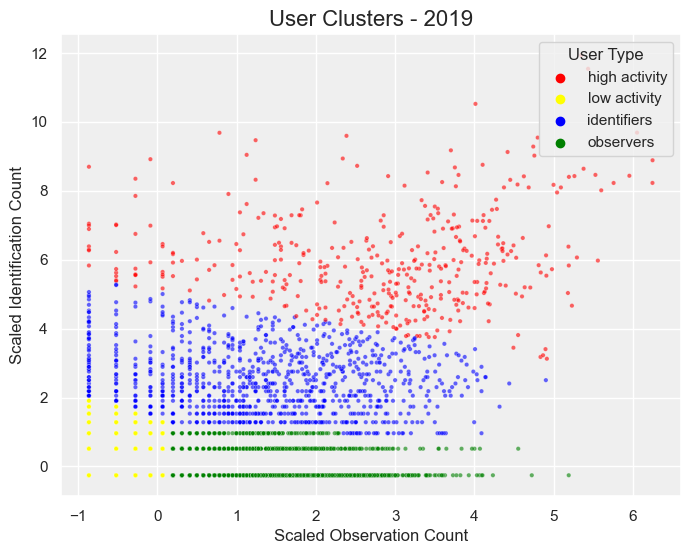

Centroids:
    obs_count_scaled  ident_count_scaled
0          1.419310            2.514239
1         -0.553896           -0.214655
2          1.048465           -0.174484
3          2.884487            6.242977
Sum of Squared Error (SSE): 12035.671916827156


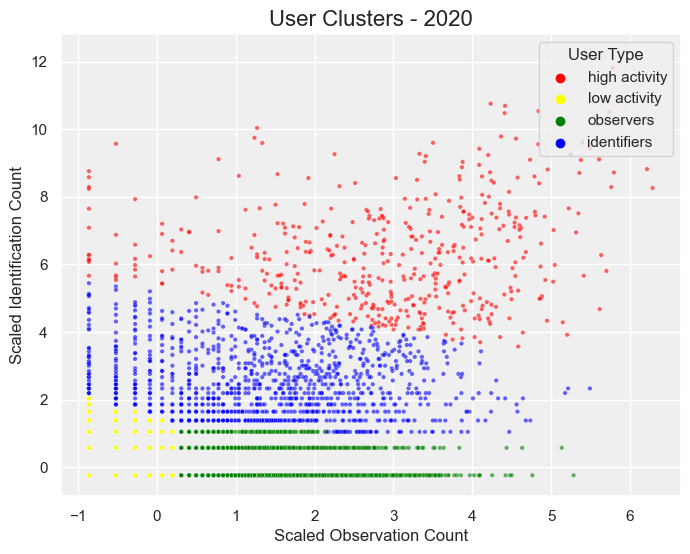

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.544905           -0.203700
1          1.068388           -0.164272
2          2.939302            6.541080
3          1.577712            2.622234
Sum of Squared Error (SSE): 13429.098537192014


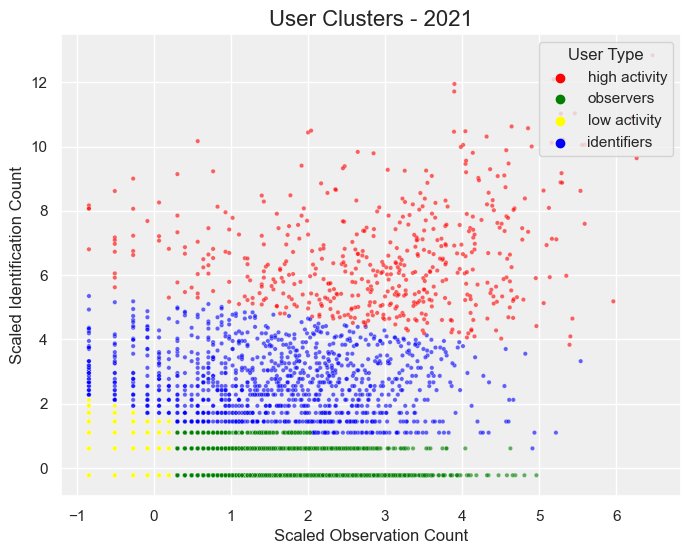

Centroids:
    obs_count_scaled  ident_count_scaled
0          0.532885           -0.160948
1          2.252457            4.941188
2          1.953026            0.155946
3         -0.623555           -0.202979
Sum of Squared Error (SSE): 13402.227112504946


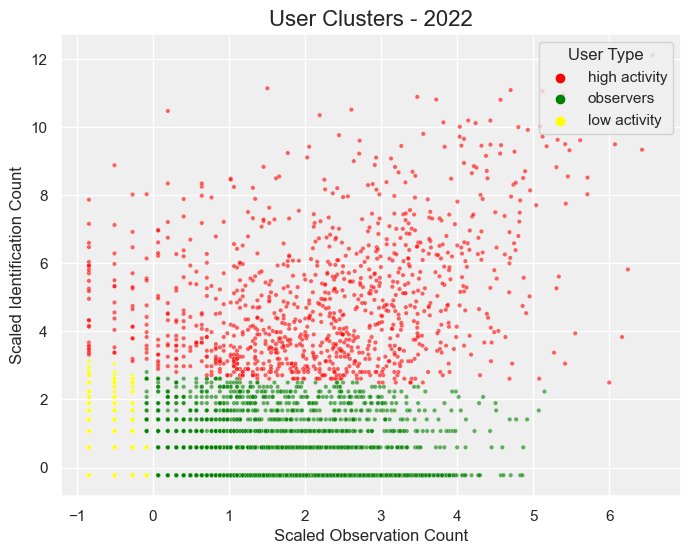

Centroids:
    obs_count_scaled  ident_count_scaled
0         -0.554869           -0.211214
1          2.630380            6.284568
2          1.551655            2.565629
3          1.086129           -0.172171
Sum of Squared Error (SSE): 12703.998843609816


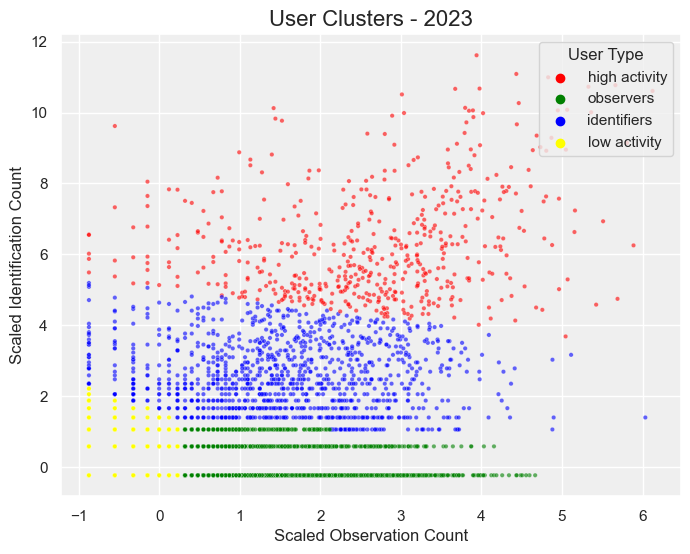

In [154]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    perform_kmeans_clustering(df)  

## DB Scan test

In [157]:
from sklearn.cluster import DBSCAN

def perform_dbscan_clustering(df):
   
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df[['obs_count_scaled', 'ident_count_scaled']])
    df['cluster'] = dbscan.labels_
    
    # Determine the label for each cluster based on the centroids
    cluster_labels = {}
    unique_clusters = np.unique(df['cluster'])
    for cluster in unique_clusters:
        if cluster == -1:  # Noise
            cluster_labels[cluster] = 'noise'
        else:
            cluster_df = df[df['cluster'] == cluster]
            obs_mean = cluster_df['obs_count_scaled'].mean()
            ident_mean = cluster_df['ident_count_scaled'].mean()
            if obs_mean > 0.5 and ident_mean > 0.5:
                cluster_labels[cluster] = 'high activity'
            elif obs_mean > 0.5:
                cluster_labels[cluster] = 'observers'
            elif ident_mean > 0.5:
                cluster_labels[cluster] = 'identifiers'
            else:
                cluster_labels[cluster] = 'low activity'
    
    # Map the cluster labels to the dataframe
    df['user_type'] = df['cluster'].map(lambda x: cluster_labels[x])
    df = df.sort_values('user_id')
    
    # Plot the clusters
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='obs_count_scaled', y='ident_count_scaled', hue='user_type', palette='Set1', s=10, alpha=0.6, edgecolor='w')
    
    plt.title('User Clusters (DBSCAN)')
    plt.xlabel('Scaled Observation Count')
    plt.ylabel('Scaled Identification Count')
    plt.legend(title='User Type')
    plt.show()
    
    return df

# Example usage:
# df = pd.read_csv('your_data.csv')
# df = perform_dbscan_clustering(df)
# print


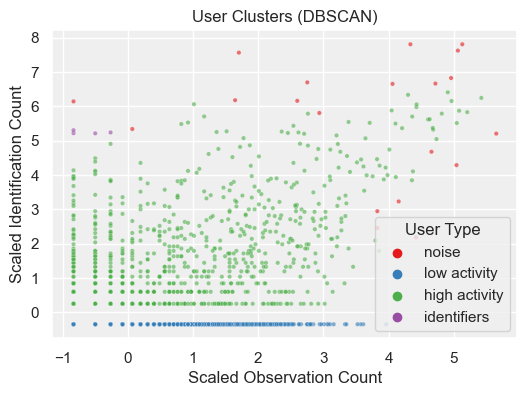

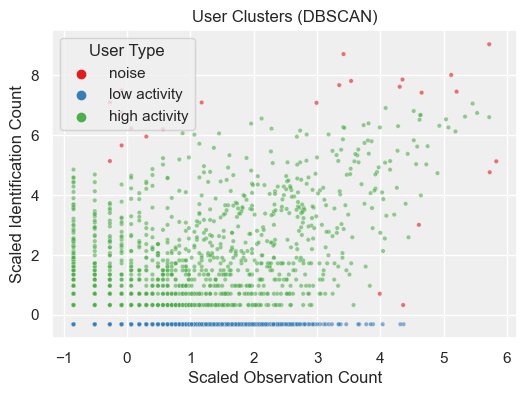

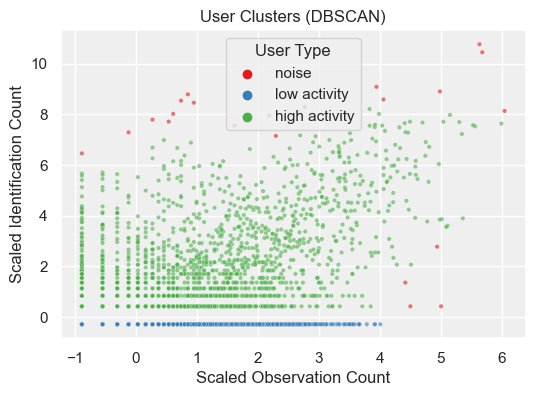

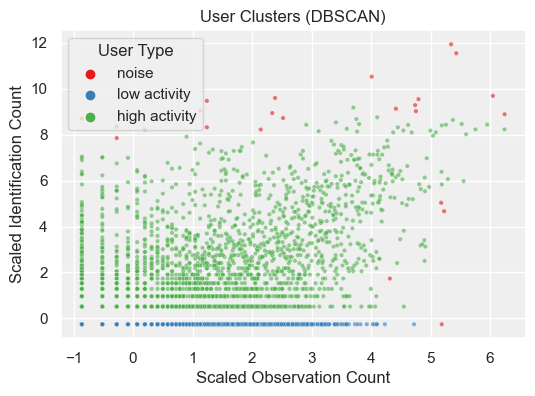

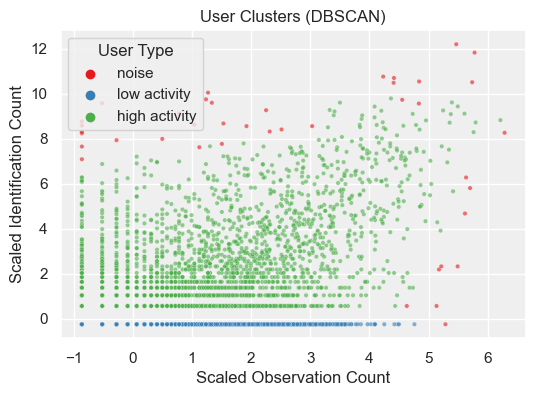

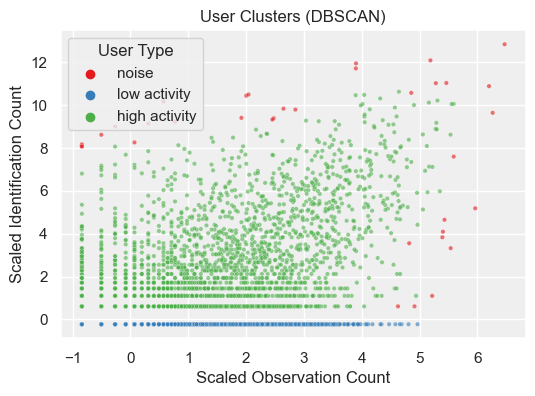

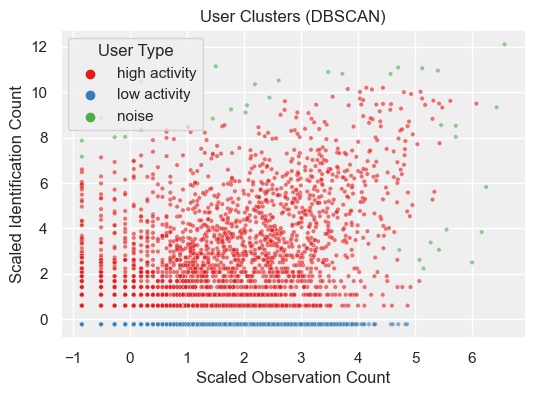

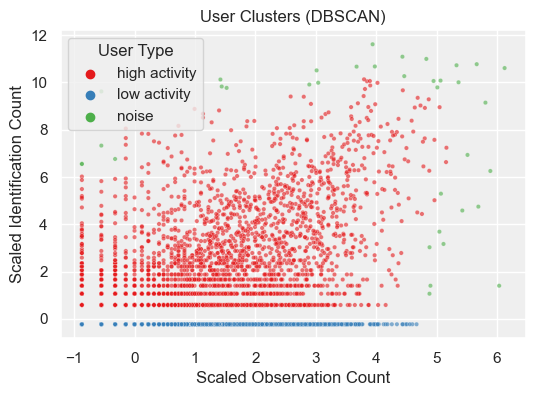

In [158]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    perform_dbscan_clustering(df) 